In [1]:
!pip install gymnasium

In [2]:
import gymnasium as gym
import numpy as np
import random
import time

In [3]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [4]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
# Hyperparameters
gamma = 0.9
learning_rate = 0.4
max_epsilon = 1.0
min_epsilon = 0.001
epsilon_decay_rate = 0.001

num_episodes = 50000
num_steps_per_episode = 100 # Each environment can have a different episode length

In [6]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [7]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 49999 finished


In [8]:
q_table

array([[2.43413462e-02, 2.33928749e-02, 1.27358793e-01, 1.45935065e-02],
       [1.54993688e-02, 6.77697408e-03, 5.78122555e-03, 6.61452934e-02],
       [7.46747134e-03, 5.15900255e-02, 1.03968585e-02, 7.68438278e-03],
       [4.49602742e-03, 8.72035965e-03, 2.52287723e-03, 4.43954245e-02],
       [1.77360146e-01, 1.44452267e-02, 2.57322754e-02, 1.60572230e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.08600648e-03, 3.72204295e-04, 9.08294775e-02, 2.78646855e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.06398716e-02, 4.51930364e-02, 6.84352578e-02, 2.14200523e-01],
       [2.99910548e-02, 3.09120848e-01, 6.61293411e-02, 8.14608689e-02],
       [3.75628013e-01, 1.93134620e-02, 1.07239095e-01, 3.18247377e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.17855665e-01, 6.51482569e-02, 3.11194024e

In [9]:
sum(rewards_all)

25709.0

In [10]:
sum(rewards_all[0:1000])

32.0

In [11]:
sum(rewards_all[1000:2000])

126.0

In [12]:
sum(rewards_all[2000:3000])

217.0

In [13]:
sum(rewards_all[9000:10000])

566.0

In [14]:
sum(rewards_all[19000:20000])

578.0

In [15]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [16]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [17]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    # print(f'Number of successes: {success}/{max_episodes}')
    # print(f'Average number of steps: {np.mean(list_of_steps)}')
    return (success, np.mean(list_of_steps))

In [18]:
play_multiple_times(env, q_table, 1000)

(521, 32.57197696737044)

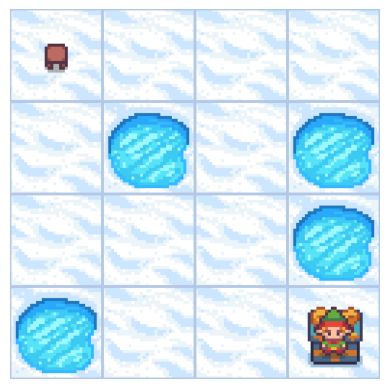

(1.0, 27)

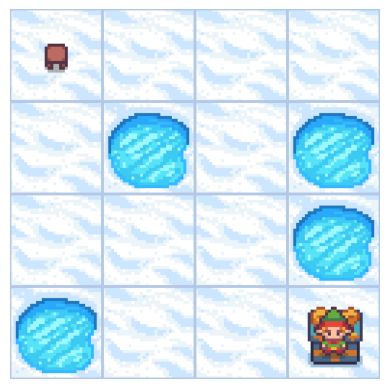

In [19]:
play(env, q_table, render=True)

In [20]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        exploration = random.uniform(0,1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])
        reward_episode = 0.0
        done = False
        for step in range(num_steps_per_episode):
            next_state, reward, terminated, truncated, _ = env.step(action)
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[next_state, next_action])

            reward_episode += reward
            state = next_state
            action = next_action
            if terminated or truncated:
                done = True
            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [21]:
q_table_sarsa, rewards_all_sarsa = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 49999 finished


In [22]:
q_table_sarsa

array([[2.03306314e-02, 6.70640059e-02, 1.92388444e-02, 1.43163366e-02],
       [2.79633918e-02, 1.26025524e-02, 1.42858918e-02, 5.76089953e-02],
       [8.21712793e-02, 1.06326242e-02, 7.03920921e-03, 6.48607928e-03],
       [3.14869864e-03, 4.28552273e-03, 2.37976932e-03, 1.20998050e-02],
       [1.16353517e-01, 2.04219508e-02, 5.87893784e-03, 2.47500665e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.11982750e-04, 6.92022260e-04, 1.90177295e-01, 3.41255017e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.60579372e-02, 1.54335056e-02, 7.46736760e-03, 1.90729005e-01],
       [6.82181479e-02, 4.58292723e-01, 7.38987123e-02, 7.40480313e-02],
       [6.11391856e-01, 1.11967762e-01, 2.09595849e-02, 6.83304103e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.33025080e-02, 1.80098834e-01, 3.44261018e

In [23]:
sum(rewards_all_sarsa)

24943.0

In [24]:
sum(rewards_all_sarsa[0:1000])

35.0

In [25]:
sum(rewards_all_sarsa[1000:2000])

91.0

In [26]:
sum(rewards_all_sarsa[2000:3000])

199.0

In [27]:
sum(rewards_all_sarsa[9000:10000])

580.0

In [28]:
sum(rewards_all_sarsa[19000:20000])

487.0

In [29]:
play_multiple_times(env, q_table_sarsa, 1000)

(501, 31.63872255489022)

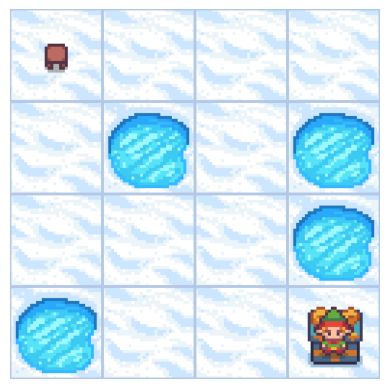

(1.0, 19)

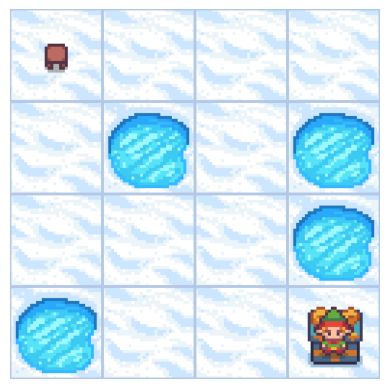

In [30]:
play(env, q_table_sarsa, render=True)

# Experiment

## Training

In [31]:
num_play_times_for_FrozenLake = 100000
num_play_times_for_Taxi = 200000

In [32]:
env_1 = gym.make('FrozenLake-v1', render_mode="rgb_array")
env_2 = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")
env_3 = gym.make('Taxi-v3', render_mode = "rgb_array")

In [33]:
q_table_1_qlearning = np.zeros((env_1.observation_space.n, env_1.action_space.n))
q_table_1_sarsa = np.zeros((env_1.observation_space.n, env_1.action_space.n))

q_table_2_qlearning = np.zeros((env_2.observation_space.n, env_2.action_space.n))
q_table_2_sarsa = np.zeros((env_2.observation_space.n, env_2.action_space.n))

q_table_3_qlearning = np.zeros((env_3.observation_space.n, env_3.action_space.n))
q_table_3_sarsa = np.zeros((env_3.observation_space.n, env_3.action_space.n))

### Experiment with FrozenLake-v1

#### Configuration

In [34]:
gamma = 0.9
learning_rate_frozenlake4x4 = 0.65
max_epsilon = 1.0
min_epsilon = 0.001
epsilon_decay_rate__frozenlake4x4 = 0.0005

num_episodes_1 = 1000000
num_steps_per_episode_frozen_lake_4x4 = 100

#### Execution

In [35]:
q_table_1_qlearning, total_reward_1_qlearning = q_learning(env_1, num_episodes_1, num_steps_per_episode_frozen_lake_4x4, learning_rate_frozenlake4x4, gamma, max_epsilon, min_epsilon, epsilon_decay_rate__frozenlake4x4)

Episode 999999 finished


In [36]:
q_table_1_sarsa, total_reward_1_sarsa = sarsa(env_1, num_episodes_1, num_steps_per_episode_frozen_lake_4x4, learning_rate_frozenlake4x4, gamma, max_epsilon, min_epsilon, epsilon_decay_rate__frozenlake4x4)

Episode 999999 finished


In [37]:
q_table_1_qlearning

array([[1.98650773e-01, 1.66437481e-02, 1.77622461e-02, 8.16061038e-03],
       [1.75233954e-03, 2.18842979e-04, 2.35145827e-03, 7.95698618e-02],
       [8.43073954e-04, 6.43629019e-04, 1.44078319e-03, 3.50798834e-02],
       [7.80576043e-05, 3.87941766e-04, 6.09616723e-03, 9.59255642e-03],
       [3.59644499e-01, 4.83290651e-04, 7.75014383e-04, 1.42606657e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.26501938e-05, 1.88660966e-05, 5.60619516e-02, 2.13295726e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.12746944e-02, 1.32934038e-02, 1.66643624e-02, 3.29621920e-01],
       [1.16543665e-02, 5.28432953e-01, 1.56498766e-02, 1.34866639e-02],
       [5.68607979e-01, 1.10082253e-03, 1.43593164e-03, 1.72312531e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.43105805e-02, 6.94554037e-02, 5.81053595e

In [38]:
q_table_1_sarsa

array([[5.67431620e-02, 2.46564338e-02, 6.65466060e-03, 7.74802859e-03],
       [1.87756966e-03, 7.88773419e-04, 3.49030219e-03, 2.83781335e-02],
       [1.71930043e-03, 2.69108047e-02, 8.56865538e-04, 1.32027752e-03],
       [1.94074852e-03, 2.01167110e-03, 1.09105047e-04, 2.21976170e-02],
       [9.55376200e-02, 2.97102394e-03, 1.19749788e-02, 2.11629762e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.71035735e-05, 2.13067100e-06, 1.98358662e-01, 2.09783134e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.71044889e-03, 2.78441967e-03, 3.28384955e-03, 3.44816015e-02],
       [1.58386218e-03, 1.89648471e-01, 2.45010770e-03, 3.84825210e-02],
       [4.73526082e-01, 2.49873976e-02, 4.22033235e-04, 2.99130676e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.07752756e-01, 5.01451115e-02, 3.98644081e

In [39]:
print(sum(total_reward_1_qlearning))
print(sum(total_reward_1_qlearning[0:1000]))
print(sum(total_reward_1_qlearning[1000:2000]))
print(sum(total_reward_1_qlearning[2000:3000]))
print(sum(total_reward_1_qlearning[9000:10000]))
print(sum(total_reward_1_qlearning[19000:20000]))
print(sum(total_reward_1_qlearning[20000:100000]))
print(sum(total_reward_1_qlearning[100000:200000]))
print(sum(total_reward_1_qlearning[200000:300000]))

574389.0
22.0
44.0
60.0
408.0
617.0
46736.0
57235.0
57834.0


In [40]:
print(sum(total_reward_1_sarsa))
print(sum(total_reward_1_sarsa[0:1000]))
print(sum(total_reward_1_sarsa[1000:2000]))
print(sum(total_reward_1_sarsa[2000:3000]))
print(sum(total_reward_1_sarsa[9000:10000]))
print(sum(total_reward_1_sarsa[19000:20000]))
print(sum(total_reward_1_sarsa[20000:100000]))
print(sum(total_reward_1_sarsa[100000:200000]))
print(sum(total_reward_1_sarsa[200000:300000]))

586364.0
16.0
23.0
50.0
431.0
532.0
47270.0
59338.0
58915.0


In [41]:
print(sum(total_reward_1_qlearning) / num_episodes_1)
print(sum(total_reward_1_qlearning[0:1000]) / 1000)
print(sum(total_reward_1_qlearning[1000:2000]) / 1000)
print(sum(total_reward_1_qlearning[2000:3000]) / 1000)
print(sum(total_reward_1_qlearning[9000:10000]) / 1000)
print(sum(total_reward_1_qlearning[19000:20000]) / 1000)
print(sum(total_reward_1_qlearning[20000:100000]) / 80000)
print(sum(total_reward_1_qlearning[100000:200000]) / 100000)
print(sum(total_reward_1_qlearning[200000:300000]) / 100000)

0.574389
0.022
0.044
0.06
0.408
0.617
0.5842
0.57235
0.57834


In [42]:
print(sum(total_reward_1_sarsa) / num_episodes_1)
print(sum(total_reward_1_sarsa[0:1000]) / 1000)
print(sum(total_reward_1_sarsa[1000:2000]) / 1000)
print(sum(total_reward_1_sarsa[2000:3000]) / 1000)
print(sum(total_reward_1_sarsa[9000:10000]) / 1000)
print(sum(total_reward_1_sarsa[19000:20000]) / 1000)
print(sum(total_reward_1_sarsa[20000:100000]) / 80000)
print(sum(total_reward_1_sarsa[100000:200000]) / 100000)
print(sum(total_reward_1_sarsa[200000:300000]) / 100000)

0.586364
0.016
0.023
0.05
0.431
0.532
0.590875
0.59338
0.58915


In [43]:
successes_1_ql = []
successes_1_sa = []
for i in range(5):
  print("Trial number ", i + 1)
  ql_number_of_successes, ql_mean_of_steps = play_multiple_times(env_1, q_table_1_qlearning, num_play_times_for_FrozenLake)
  sa_number_of_successes, sa_mean_of_steps = play_multiple_times(env_1, q_table_1_sarsa, num_play_times_for_FrozenLake)
  print(f'Number of successes of using Q-learning algorithm in map FrozenLake-v1 : {ql_number_of_successes}/{num_play_times_for_FrozenLake}, Average steps: {ql_mean_of_steps} steps')
  print(f'Number of successes of using Sarsa algorithm in map FrozenLake-v1 : {sa_number_of_successes}/{num_play_times_for_FrozenLake}, Average steps: {sa_mean_of_steps} steps')
  successes_1_ql.append(ql_number_of_successes)
  successes_1_sa.append(sa_number_of_successes)

Trial number  1
Number of successes of using Q-learning algorithm in map FrozenLake-v1 : 73991/100000, Average steps: 38.553337568082604 steps
Number of successes of using Sarsa algorithm in map FrozenLake-v1 : 72771/100000, Average steps: 37.429841557763396 steps
Trial number  2
Number of successes of using Q-learning algorithm in map FrozenLake-v1 : 74017/100000, Average steps: 38.62395125444155 steps
Number of successes of using Sarsa algorithm in map FrozenLake-v1 : 72913/100000, Average steps: 37.4306090820567 steps
Trial number  3
Number of successes of using Q-learning algorithm in map FrozenLake-v1 : 74012/100000, Average steps: 38.46797816570286 steps
Number of successes of using Sarsa algorithm in map FrozenLake-v1 : 72747/100000, Average steps: 37.46671340398917 steps
Trial number  4
Number of successes of using Q-learning algorithm in map FrozenLake-v1 : 73881/100000, Average steps: 38.53188235134879 steps
Number of successes of using Sarsa algorithm in map FrozenLake-v1 : 

In [44]:
mean_successes_1_ql = np.mean(successes_1_ql)
mean_successes_1_sa = np.mean(successes_1_sa)
print(f'\nMean number of successes for using Q-learning algorithm: {mean_successes_1_ql}/{num_play_times_for_FrozenLake}')
print(f'\nMean number of successes for using Sarsa algorithm: {mean_successes_1_sa}/{num_play_times_for_FrozenLake}')


Mean number of successes for using Q-learning algorithm: 74011.8/100000

Mean number of successes for using Sarsa algorithm: 72829.2/100000


### Experiment with FrozenLake8x8-v1

#### Configuration

In [45]:
# Hyperparameters
gamma = 0.9
learning_rate_8x8 = 0.9
max_epsilon = 1.0
min_epsilon = 0.001
epsilon_decay_rate = 0.00005

num_episodes_2 = 1000000
num_steps_per_episode_frozen_lake_8x8 = 200

#### Execution

In [46]:
q_table_2_qlearning, total_reward_2_qlearning = q_learning(env_2, num_episodes_2, num_steps_per_episode_frozen_lake_8x8, learning_rate_8x8, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 999999 finished


In [47]:
q_table_2_sarsa, total_reward_2_sarsa = sarsa(env_2, num_episodes_2, num_steps_per_episode_frozen_lake_8x8, learning_rate_8x8, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 999999 finished


In [48]:
q_table_2_qlearning

array([[1.37732298e-04, 2.64994846e-05, 9.06574137e-04, 6.19873017e-05],
       [8.54618813e-05, 7.64092264e-05, 8.88837789e-05, 3.63196128e-03],
       [6.73678878e-05, 1.04675844e-04, 5.54759919e-03, 3.18435877e-04],
       [1.07329460e-04, 3.63201630e-03, 1.09997014e-04, 3.68204886e-04],
       [1.46543102e-04, 1.45478148e-04, 8.88478502e-03, 1.45647483e-04],
       [5.18944031e-03, 3.95252568e-04, 1.98557891e-03, 1.51067877e-04],
       [3.07594657e-03, 1.97728436e-04, 1.32287283e-02, 4.02901091e-04],
       [3.14743788e-02, 2.23486431e-04, 2.97385293e-03, 2.17763379e-04],
       [6.06351603e-05, 1.73637998e-04, 2.85643525e-05, 6.34173286e-04],
       [6.59601569e-05, 2.51069020e-05, 6.48627745e-05, 2.03790622e-03],
       [2.34980377e-05, 2.84132257e-05, 2.43878714e-03, 1.00731106e-03],
       [1.70279597e-06, 1.64434308e-06, 2.37354439e-05, 7.03936204e-03],
       [7.10745847e-05, 3.22379343e-05, 6.32420492e-05, 3.57562063e-03],
       [1.34680254e-04, 1.40516595e-04, 1.47292276e

In [49]:
q_table_2_sarsa

array([[1.44327807e-04, 9.10417471e-05, 1.59029882e-04, 2.08938790e-03],
       [9.42281809e-05, 9.51467053e-05, 1.01832665e-03, 9.24086452e-05],
       [1.62102637e-04, 1.35654575e-04, 1.23237876e-04, 1.90408597e-03],
       [4.21186360e-04, 3.80314086e-04, 6.94473018e-05, 3.59359888e-03],
       [2.86146233e-04, 1.77036690e-02, 4.87007125e-04, 1.00624499e-03],
       [4.05161414e-04, 5.19886219e-04, 1.58202949e-02, 1.37042416e-03],
       [1.37511180e-03, 6.30380443e-03, 1.47033819e-03, 4.05761793e-03],
       [1.57479748e-03, 1.14848667e-01, 8.25001074e-04, 1.47828085e-03],
       [1.43965671e-05, 4.74226372e-05, 8.84997816e-05, 3.78709788e-03],
       [8.11999330e-05, 3.60554327e-03, 7.57024976e-05, 1.53521629e-04],
       [1.94448376e-04, 1.80040500e-05, 3.74594452e-04, 1.58426437e-03],
       [1.35226997e-04, 5.32037925e-05, 9.22192827e-06, 2.29521531e-03],
       [2.25998209e-03, 1.48473455e-04, 3.14821384e-04, 4.52822628e-04],
       [3.07900305e-04, 8.99571882e-02, 6.79027746e

In [50]:
print(sum(total_reward_2_qlearning))
print(sum(total_reward_2_qlearning[0:1000]))
print(sum(total_reward_2_qlearning[1000:2000]))
print(sum(total_reward_2_qlearning[2000:3000]))
print(sum(total_reward_2_qlearning[9000:10000]))
print(sum(total_reward_2_qlearning[19000:20000]))
print(sum(total_reward_2_qlearning[20000:100000]))
print(sum(total_reward_2_qlearning[100000:200000]))
print(sum(total_reward_2_qlearning[200000:400000]))


542932.0
3.0
3.0
4.0
3.0
15.0
15720.0
55084.0
118034.0


In [51]:
print(sum(total_reward_2_sarsa))
print(sum(total_reward_2_sarsa[0:1000]))
print(sum(total_reward_2_sarsa[1000:2000]))
print(sum(total_reward_2_sarsa[2000:3000]))
print(sum(total_reward_2_sarsa[9000:10000]))
print(sum(total_reward_2_sarsa[19000:20000]))
print(sum(total_reward_2_sarsa[20000:100000]))
print(sum(total_reward_2_sarsa[100000:200000]))
print(sum(total_reward_2_sarsa[200000:400000]))

539823.0
1.0
2.0
2.0
7.0
11.0
12265.0
54089.0
120376.0


In [52]:
print(sum(total_reward_2_qlearning) / num_episodes_2)
print(sum(total_reward_2_qlearning[0:1000]) / 1000)
print(sum(total_reward_2_qlearning[1000:2000]) / 1000)
print(sum(total_reward_2_qlearning[2000:3000]) / 1000)
print(sum(total_reward_2_qlearning[9000:10000]) / 1000)
print(sum(total_reward_2_qlearning[19000:20000]) / 1000)
print(sum(total_reward_2_qlearning[20000:100000]) / 80000)
print(sum(total_reward_2_qlearning[100000:200000]) / 100000)
print(sum(total_reward_2_qlearning[200000:400000]) / 200000)


0.542932
0.003
0.003
0.004
0.003
0.015
0.1965
0.55084
0.59017


In [53]:
print(sum(total_reward_2_sarsa) / num_episodes_2)
print(sum(total_reward_2_sarsa[0:1000]) / 1000)
print(sum(total_reward_2_sarsa[1000:2000]) / 1000)
print(sum(total_reward_2_sarsa[2000:3000]) / 1000)
print(sum(total_reward_2_sarsa[9000:10000]) / 1000)
print(sum(total_reward_2_sarsa[19000:20000]) / 1000)
print(sum(total_reward_2_sarsa[20000:100000]) / 80000)
print(sum(total_reward_2_sarsa[100000:200000]) / 100000)
print(sum(total_reward_2_sarsa[200000:400000]) / 200000)

0.539823
0.001
0.002
0.002
0.007
0.011
0.1533125
0.54089
0.60188


In [54]:
successes_2_ql = []
successes_2_sa = []
for i in range(5):
  print("Trial number ", i + 1)
  ql_number_of_successes, ql_mean_of_steps = play_multiple_times(env_2, q_table_2_qlearning, num_play_times_for_FrozenLake)
  sa_number_of_successes, sa_mean_of_steps = play_multiple_times(env_2, q_table_2_sarsa, num_play_times_for_FrozenLake)
  print(f'Number of successes of using Q-learning algorithm in map FrozenLake8x8-v1 : {ql_number_of_successes}/{num_play_times_for_FrozenLake}, Average steps: {ql_mean_of_steps} steps')
  print(f'Number of successes of using Sarsa algorithm in map FrozenLake8x8-v1 : {sa_number_of_successes}/{num_play_times_for_FrozenLake}, Average steps: {sa_mean_of_steps} steps')
  successes_2_ql.append(ql_number_of_successes)
  successes_2_sa.append(sa_number_of_successes)

Trial number  1
Number of successes of using Q-learning algorithm in map FrozenLake8x8-v1 : 67193/100000, Average steps: 98.79588647626984 steps
Number of successes of using Sarsa algorithm in map FrozenLake8x8-v1 : 54837/100000, Average steps: 97.0821890329522 steps
Trial number  2
Number of successes of using Q-learning algorithm in map FrozenLake8x8-v1 : 67219/100000, Average steps: 98.55952929975156 steps
Number of successes of using Sarsa algorithm in map FrozenLake8x8-v1 : 55072/100000, Average steps: 96.90514235909355 steps
Trial number  3
Number of successes of using Q-learning algorithm in map FrozenLake8x8-v1 : 67228/100000, Average steps: 98.6097013149283 steps
Number of successes of using Sarsa algorithm in map FrozenLake8x8-v1 : 54761/100000, Average steps: 97.3032084877924 steps
Trial number  4
Number of successes of using Q-learning algorithm in map FrozenLake8x8-v1 : 67133/100000, Average steps: 98.50525077085786 steps
Number of successes of using Sarsa algorithm in map

In [55]:
mean_successes_2_ql = np.mean(successes_2_ql)
mean_successes_2_sa = np.mean(successes_2_sa)
print(f'\nMean number of successes for using Q-learning algorithm: {mean_successes_2_ql}/{num_play_times_for_FrozenLake}')
print(f'\nMean number of successes for using Sarsa algorithm: {mean_successes_2_sa}/{num_play_times_for_FrozenLake}')


Mean number of successes for using Q-learning algorithm: 67202.6/100000

Mean number of successes for using Sarsa algorithm: 54889.8/100000


### Experiment with Taxi-v3

#### Configuration

In [56]:
# Hyperparameters
gamma = 0.9
learning_rate_taxi = 0.4
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate_taxi = 0.005

num_episodes_3 = 150000
num_steps_per_episode_taxi = 200

#### Execution

In [57]:
q_table_3_qlearning, total_reward_3_qlearning = q_learning(env_3, num_episodes_3, num_steps_per_episode_taxi, learning_rate_taxi, gamma, max_epsilon, min_epsilon, epsilon_decay_rate_taxi)

Episode 149999 finished


In [58]:
q_table_3_sarsa, total_reward_3_sarsa = sarsa(env_3, num_episodes_3, num_steps_per_episode_taxi, learning_rate_taxi, gamma, max_epsilon, min_epsilon, epsilon_decay_rate_taxi)

Episode 149999 finished


In [59]:
q_table_3_qlearning

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -0.58594419,   0.46034016,  -0.58578032,   0.45884711,
          1.62261467,  -8.53964919],
       [  4.34422277,   5.94134894,   4.34807807,   5.94322247,
          7.7147    ,  -3.05677062],
       ...,
       [ -2.55597342,   9.6827569 ,  -2.44149509,  -2.41325963,
         -4.        ,  -8.704     ],
       [ -2.74855133,   2.8903833 ,  -2.74383529,  -2.49677641,
         -9.49864038, -11.04917721],
       [ -0.064     ,   6.76402856,   4.43773021,  17.        ,
         -3.66082979,  -6.4       ]])

In [60]:
q_table_3_sarsa

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -2.68051455,  -2.57562524,  -3.16097714,  -2.68577599,
          1.03213497,  -8.62026858],
       [  2.54627946,   2.66952394,  -0.96112968,   2.63665055,
          7.15123859,  -3.1228396 ],
       ...,
       [  5.30950114,   9.68235831,   6.15475669,   3.9526011 ,
         -1.79874202,  -1.34504761],
       [-15.78595431, -15.59794594, -14.01276746,   1.41163855,
        -23.19808553, -22.12862548],
       [  0.        ,   0.        ,   5.71997953,  17.        ,
          0.        ,   1.56967464]])

In [61]:
print(sum(total_reward_3_qlearning))
print(sum(total_reward_3_qlearning[0:1000]))
print(sum(total_reward_3_qlearning[1000:2000]))
print(sum(total_reward_3_qlearning[2000:3000]))
print(sum(total_reward_3_qlearning[9000:10000]))
print(sum(total_reward_3_qlearning[19000:20000]))
print(sum(total_reward_3_qlearning[20000:100000]))
print(sum(total_reward_3_qlearning[100000:150000]))

1009925.0
-95268.0
6989.0
7324.0
7417.0
7488.0
593779.0
370773.0


In [62]:
print(sum(total_reward_3_sarsa))
print(sum(total_reward_3_sarsa[0:1000]))
print(sum(total_reward_3_sarsa[1000:2000]))
print(sum(total_reward_3_sarsa[2000:3000]))
print(sum(total_reward_3_sarsa[9000:10000]))
print(sum(total_reward_3_sarsa[19000:20000]))
print(sum(total_reward_3_sarsa[20000:100000]))
print(sum(total_reward_3_sarsa[100000:150000]))

756264.0
-175694.0
-22600.0
-1660.0
5700.0
6273.0
524548.0
336202.0


In [63]:
print(sum(total_reward_3_qlearning) / num_episodes_3)
print(sum(total_reward_3_qlearning[0:1000]) / 1000)
print(sum(total_reward_3_qlearning[1000:2000]) / 1000)
print(sum(total_reward_3_qlearning[2000:3000]) / 1000)
print(sum(total_reward_3_qlearning[9000:10000]) / 1000)
print(sum(total_reward_3_qlearning[19000:20000]) / 1000)
print(sum(total_reward_3_qlearning[20000:100000]) / 80000)
print(sum(total_reward_3_qlearning[100000:150000]) / 50000)

6.732833333333334
-95.268
6.989
7.324
7.417
7.488
7.4222375
7.41546


In [64]:
print(sum(total_reward_3_sarsa) / num_episodes_3)
print(sum(total_reward_3_sarsa[0:1000]) / 1000)
print(sum(total_reward_3_sarsa[1000:2000]) / 1000)
print(sum(total_reward_3_sarsa[2000:3000]) / 1000)
print(sum(total_reward_3_sarsa[9000:10000]) / 1000)
print(sum(total_reward_3_sarsa[19000:20000]) / 1000)
print(sum(total_reward_3_sarsa[20000:100000]) / 80000)
print(sum(total_reward_3_sarsa[100000:150000]) / 50000)

5.04176
-175.694
-22.6
-1.66
5.7
6.273
6.55685
6.72404


In [65]:
successes_3_ql = []
successes_3_sa = []
for i in range(5):
  print("Trial number ", i + 1)
  ql_number_of_successes, ql_mean_of_steps = play_multiple_times(env_3, q_table_3_qlearning, num_play_times_for_Taxi)
  sa_number_of_successes, sa_mean_of_steps = play_multiple_times(env_3, q_table_3_sarsa, num_play_times_for_Taxi)
  print(f'Number of successes of using Q-learning algorithm in map Taxi-v3 : {ql_number_of_successes}/{num_play_times_for_Taxi}, Average steps: {ql_mean_of_steps} steps')
  print(f'Number of successes of using Sarsa algorithm in map Taxi-v3 : {sa_number_of_successes}/{num_play_times_for_Taxi}, Average steps: {sa_mean_of_steps} steps')
  successes_3_ql.append(ql_number_of_successes)
  successes_3_sa.append(sa_number_of_successes)

Trial number  1
Number of successes of using Q-learning algorithm in map Taxi-v3 : 200000/200000, Average steps: 13.0707 steps
Number of successes of using Sarsa algorithm in map Taxi-v3 : 198602/200000, Average steps: 13.565447477870313 steps
Trial number  2
Number of successes of using Q-learning algorithm in map Taxi-v3 : 200000/200000, Average steps: 13.085215 steps
Number of successes of using Sarsa algorithm in map Taxi-v3 : 198660/200000, Average steps: 13.548202959830867 steps
Trial number  3
Number of successes of using Q-learning algorithm in map Taxi-v3 : 200000/200000, Average steps: 13.08606 steps
Number of successes of using Sarsa algorithm in map Taxi-v3 : 198687/200000, Average steps: 13.56246256675072 steps
Trial number  4
Number of successes of using Q-learning algorithm in map Taxi-v3 : 200000/200000, Average steps: 13.06839 steps
Number of successes of using Sarsa algorithm in map Taxi-v3 : 198694/200000, Average steps: 13.567218939676085 steps
Trial number  5
Numbe

In [66]:
mean_successes_3_ql = np.mean(successes_3_ql)
mean_successes_3_sa = np.mean(successes_3_sa)
print(f'\nMean number of successes for using Q-learning algorithm: {mean_successes_3_ql}/{num_play_times_for_Taxi}')
print(f'\nMean number of successes for using Sarsa algorithm: {mean_successes_3_sa}/{num_play_times_for_Taxi}')


Mean number of successes for using Q-learning algorithm: 200000.0/200000

Mean number of successes for using Sarsa algorithm: 198668.6/200000


## Evaluation

### FrozenLake-v1

In [67]:
window = 1000
average_y_1_ql = []
average_y_1_sa = []
for ind in range(len(total_reward_1_qlearning) - window + 1):
    average_y_1_ql.append(np.mean(total_reward_1_qlearning[ind:ind+window]))
for ind in range(len(total_reward_1_sarsa) - window + 1):
    average_y_1_sa.append(np.mean(total_reward_1_sarsa[ind:ind+window]))

In [68]:
for ind in range(window - 1):
    average_y_1_ql.insert(0, np.nan)
    average_y_1_sa.insert(0, np.nan)

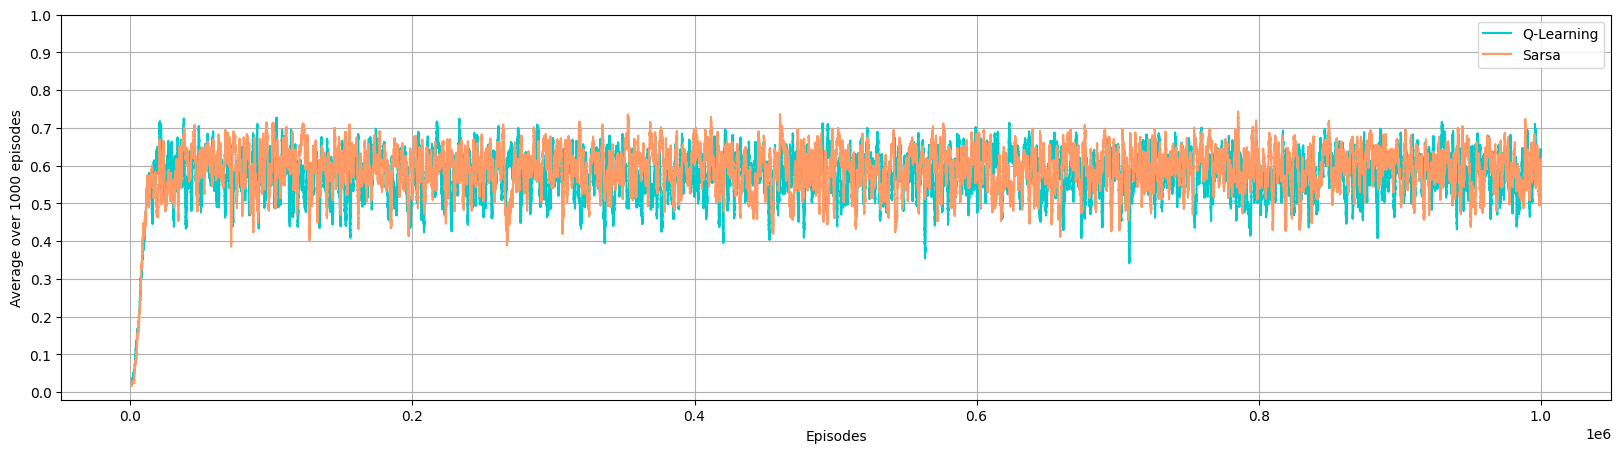

In [69]:
plt.figure(figsize=(20, 5))
plt.plot(np.arange(len(total_reward_1_qlearning)), average_y_1_ql, color='#00CCCC', label='Q-Learning')
plt.plot(np.arange(len(total_reward_1_sarsa)), average_y_1_sa, color='#FF9966', label='Sarsa')
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

### FrozenLake8x8-v1

In [70]:
window = 1000
average_y_2_ql = []
average_y_2_sa = []
for ind in range(len(total_reward_2_qlearning) - window + 1):
    average_y_2_ql.append(np.mean(total_reward_2_qlearning[ind:ind+window]))
for ind in range(len(total_reward_2_sarsa) - window + 1):
    average_y_2_sa.append(np.mean(total_reward_2_sarsa[ind:ind+window]))

In [71]:
for ind in range(window - 1):
    average_y_2_ql.insert(0, np.nan)
    average_y_2_sa.insert(0, np.nan)

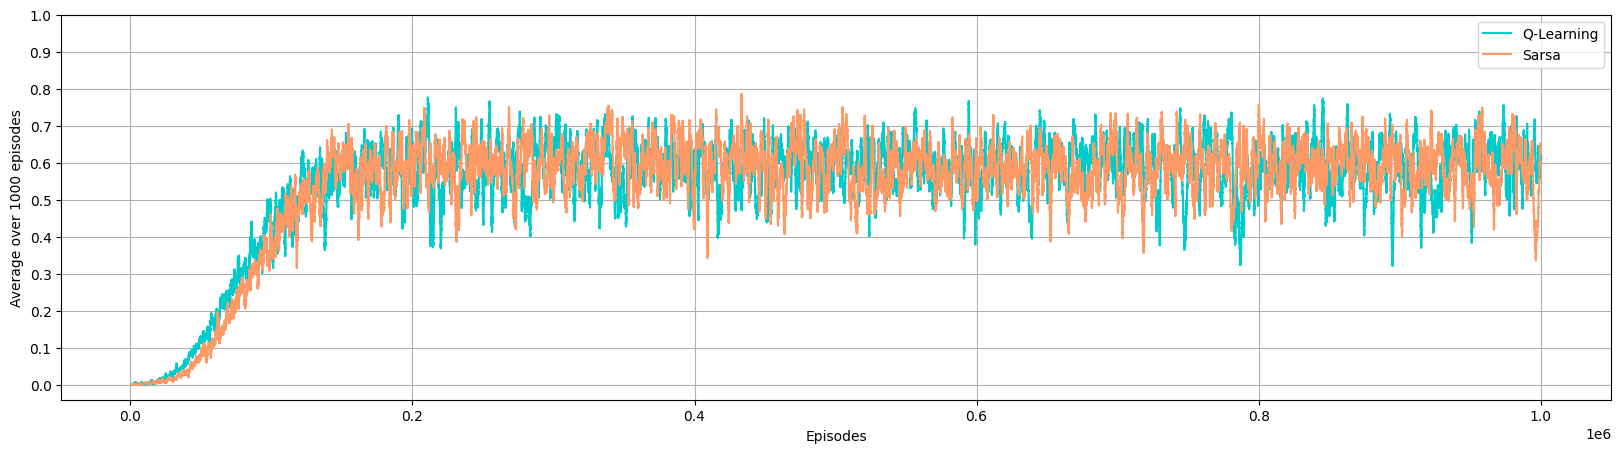

In [72]:
plt.figure(figsize=(20, 5))
plt.plot(np.arange(len(total_reward_2_qlearning)), average_y_2_ql, color='#00CCCC', label='Q-Learning')
plt.plot(np.arange(len(total_reward_2_sarsa)), average_y_2_sa, color='#FF9966', label='Sarsa')
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

### Taxi-v3

In [73]:
window = 300
average_y_3_ql = []
average_y_3_sa = []
for ind in range(len(total_reward_3_qlearning) - window + 1):
    average_y_3_ql.append(np.mean(total_reward_3_qlearning[ind:ind+window]))
for ind in range(len(total_reward_3_sarsa) - window + 1):
    average_y_3_sa.append(np.mean(total_reward_3_sarsa[ind:ind+window]))

In [74]:
for ind in range(window - 1):
    average_y_3_ql.insert(0, np.nan)
    average_y_3_sa.insert(0, np.nan)

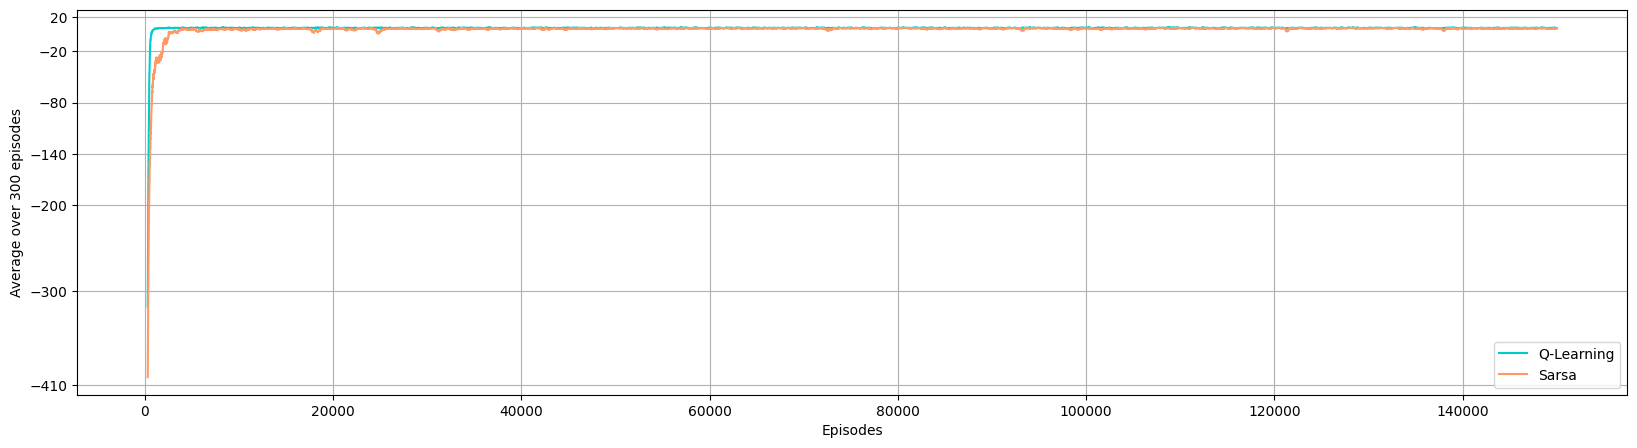

In [75]:
plt.figure(figsize=(20, 5))
plt.plot(np.arange(len(total_reward_3_qlearning)), average_y_3_ql, color='#00CCCC', label='Q-Learning')
plt.plot(np.arange(len(total_reward_3_sarsa)), average_y_3_sa, color='#FF9966', label='Sarsa')
plt.yticks([-410, -300, -200, -140, -80, -20, 20])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

# Conclusion